In [80]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [5]:
pad = "C:/Users/mbrouwer/OneDrive - Waterschap/Anaconda/Extern/Hackathon HHD"
df = pd.read_excel(pad + "/Input/Macrofyten_Hackathon_update25_06.xlsx")

In [8]:
df_richness = pd.read_excel(pad + "/Input/Macrofyten_Hackathon_update25_06.xlsx", sheet_name = "Macrofyten_Richness")
df_EKR = pd.read_excel(pad + "/Input/Macrofyten_Hackathon_update25_06.xlsx", sheet_name = "Macrofyten_EKR")
df_Chemie = pd.read_excel(pad + "/Input/Macrofyten_Hackathon_update25_06.xlsx", sheet_name = "Chemie_meetgegevens")
df_Meetpunt = pd.read_excel(pad + "/Input/Macrofyten_Hackathon_update25_06.xlsx", sheet_name = "Meetpunt_informatie")
df_Weer = pd.read_excel(pad + "/Input/Macrofyten_Hackathon_update25_06.xlsx", sheet_name = "Weer_historie")

In [9]:
df_EKR

,MeetObject,jaar,EKR
0,OW006-003,2020,0.000
1,OW006-003,2014,0.067
2,OW004-001,2018,0.000
3,OW004-001,2021,0.000
4,OW006-003,2017,0.260
...,...,...,...
1577,OW041-001,2013,NaN
1578,OW053-003,2015,NaN
1579,OW069-003,2015,NaN
1580,OW075-000,2020,NaN


In [63]:
df_EKR["EKR"].value_counts()

EKR
0.000    212
0.200     55
0.100     51
0.067     47
0.267     30
        ... 
0.657      1
0.647      1
0.641      1
0.675      1
0.064      1
Name: count, Length: 405, dtype: int64

In [10]:
df_EKR.describe()

,jaar,EKR
count,1582.000000,1548.000000
mean,2018.199115,0.218382
std,3.344284,0.190265
min,2013.000000,0.000000
25%,2016.000000,0.064750
50%,2018.000000,0.189500
75%,2021.000000,0.334500
max,2024.000000,0.934000


In [14]:
df_EKR.EKR.dtype

dtype('float64')

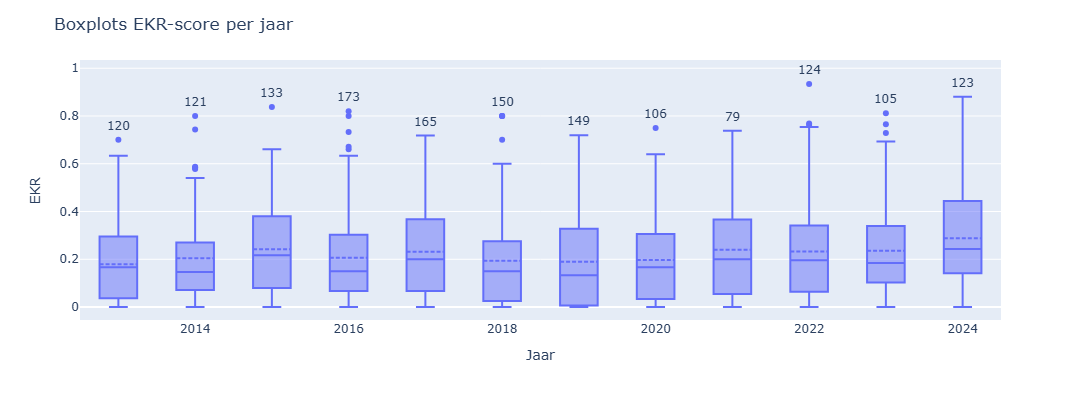

In [57]:
fig = px.box(df_EKR, x = "jaar", y = "EKR", width = 1000, height = 400)
fig.update_layout(title = "Boxplots EKR-score per jaar", xaxis_title = "Jaar", yaxis_title = "EKR")
fig.update_traces(boxmean=True)

for j in df_EKR_aantal.jaar.unique():
    fig.add_annotation(x = j,
                       y = df_EKR[df_EKR['jaar'] == j]['EKR'].max(),
                       text = str(df_EKR_aantal[df_EKR_aantal['jaar'] == j]['EKR'].values[0]),
                       yshift = 15,
                       showarrow = False
                      )

fig.show()

In [58]:
# df_EKR_aantal = df_EKR.groupby("jaar").count().reset_index()
# fig2 = px.histogram(df_EKR_aantal, x = "jaar", y = "EKR", title = "Aantal EKR-score per jaar", width = 1000, height = 400)
# fig2.update_xaxes(type='category')

In [59]:
df_Weer

,Jaar,Maand,Dag,Regen,Zonuren,Temp_lucht
0,1976,1,1,12.5,0.0,5.7
1,1976,1,2,5.9,0.0,6.6
2,1976,1,3,0.8,0.0,6.5
3,1976,1,4,1.3,0.0,4.5
4,1976,1,5,9.0,1.1,7.5
...,...,...,...,...,...,...
18062,2025,6,14,0.9,4.4,21.3
18063,2025,6,15,0.0,12.8,17.6
18064,2025,6,16,0.0,15.2,17.9
18065,2025,6,17,0.0,13.4,18.9


In [81]:
df_EKR_Meetpunt = df_EKR.merge(df_Meetpunt, left_on = "MeetObject", right_on = "MeetObject", how = "left")

In [89]:
df_EKR_Meetpunt.groupby("Landgebruik").count().reset_index()

,Landgebruik,MeetObject,jaar,EKR,Naam,Gemeente,X,Y,Meetnet,Vaarwater,Gebied_Type
0,Glas,171,171,168,171,171,171,171,171,171,171
1,Gras,202,202,193,202,202,202,202,202,202,202
2,Stad,416,416,405,416,412,416,416,416,416,416


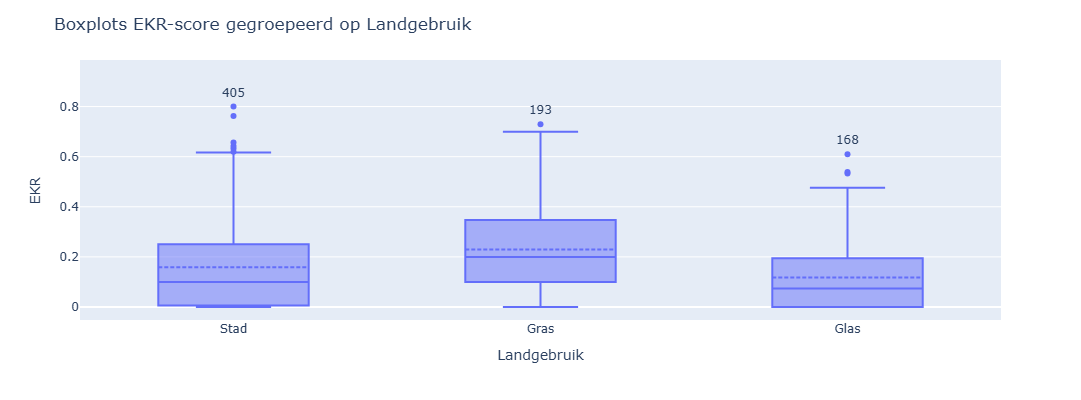

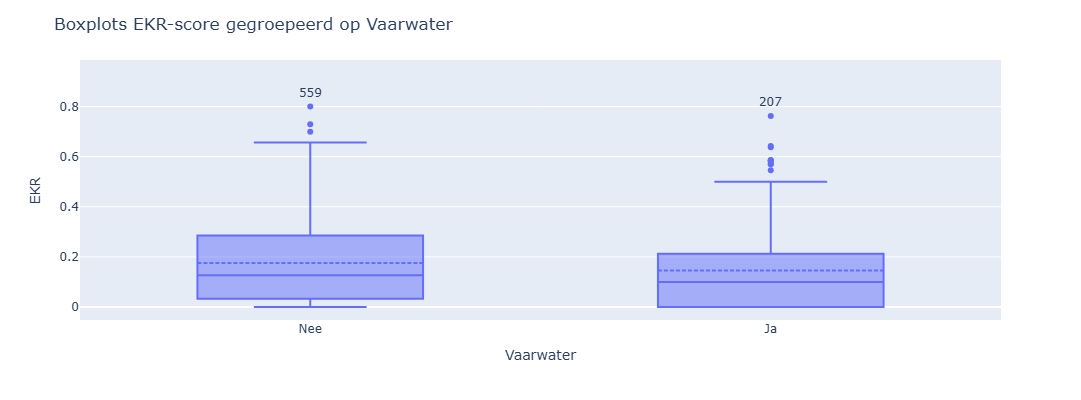

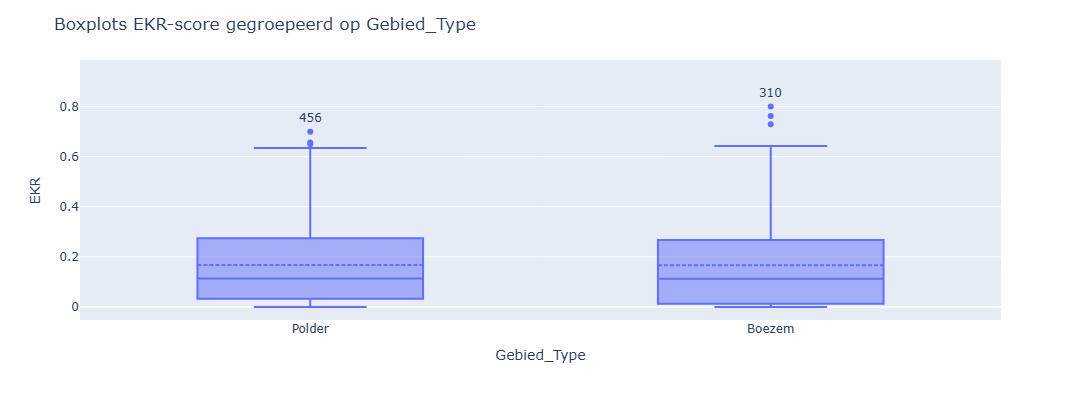

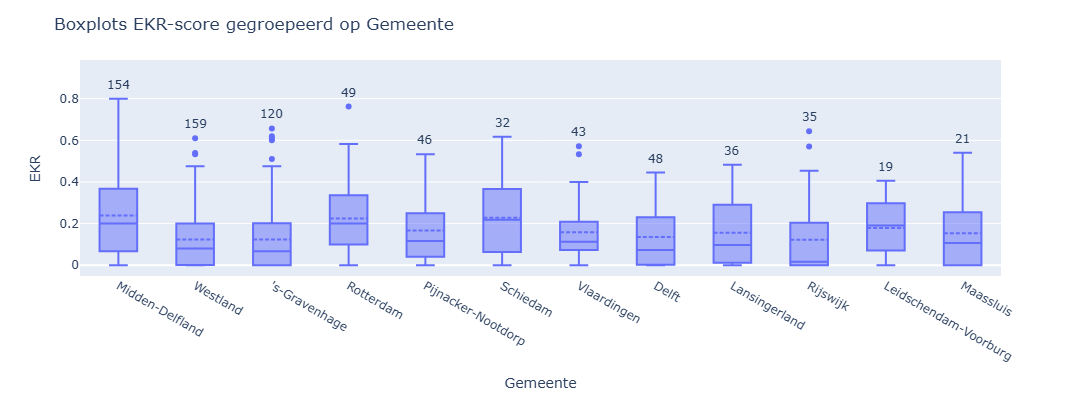

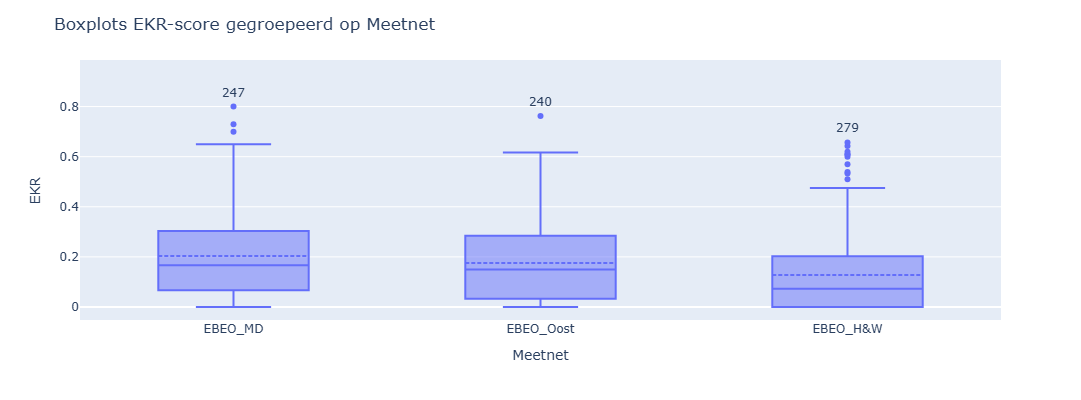

In [98]:
for kolom in ["Landgebruik", "Vaarwater", "Gebied_Type", "Gemeente", "Meetnet"]: 
    fig3 = px.box(df_EKR_Meetpunt, x = kolom, y = "EKR", width = 1000, height = 400)
    fig3.update_layout(title = "Boxplots EKR-score gegroepeerd op " + kolom, xaxis_title = kolom, yaxis_title = "EKR")
    fig3.update_traces(boxmean=True)

    df_tel = df_EKR_Meetpunt.groupby(kolom).count().reset_index()
    # print(df_tel)
    for c in df_tel[kolom].unique():
        # print(c)
        fig3.add_annotation(x = c,
                       y = df_EKR_Meetpunt[df_EKR_Meetpunt[kolom] == c]['EKR'].max(),
                       text = str(df_tel[df_tel[kolom] == c]['EKR'].values[0]),
                       yshift = 15,
                       showarrow = False
                      )
    fig3.update_layout(xaxis={'categoryorder':'total descending'})
    
    fig3.show()

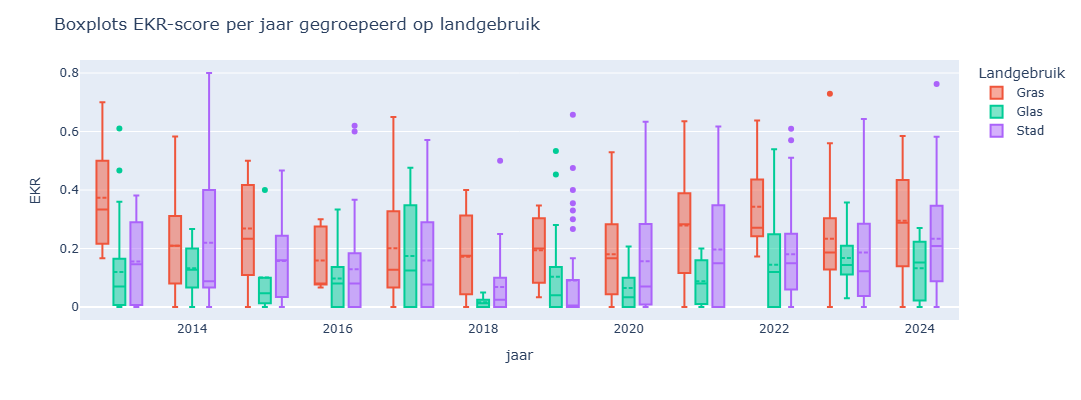

In [83]:
fig4 = px.box(df_EKR_Meetpunt, x = "jaar", y = "EKR", color  = "Landgebruik", width = 1000, height = 400)
fig4.update_layout(title = "Boxplots EKR-score per jaar gegroepeerd op landgebruik", xaxis_title = "jaar", yaxis_title = "EKR")
fig4.update_traces(boxmean=True)
# fig4.update_xaxes(type='category')

In [102]:
df_Chemie_grouped = df_Chemie.groupby(["MeetObject", "Jaar"]).mean().reset_index()

In [105]:
df_Chemie_grouped = df_Chemie_grouped.drop("Maand", axis = 1)

In [110]:
df_EKR_Chemie = df_Chemie_grouped.merge(df_EKR, left_on = ["MeetObject", "Jaar"], right_on = ["MeetObject", "jaar"], how = "left")

In [112]:
df_EKR_Chemie_heatmap = df_EKR_Chemie.drop(["MeetObject", "jaar"], axis = 1)

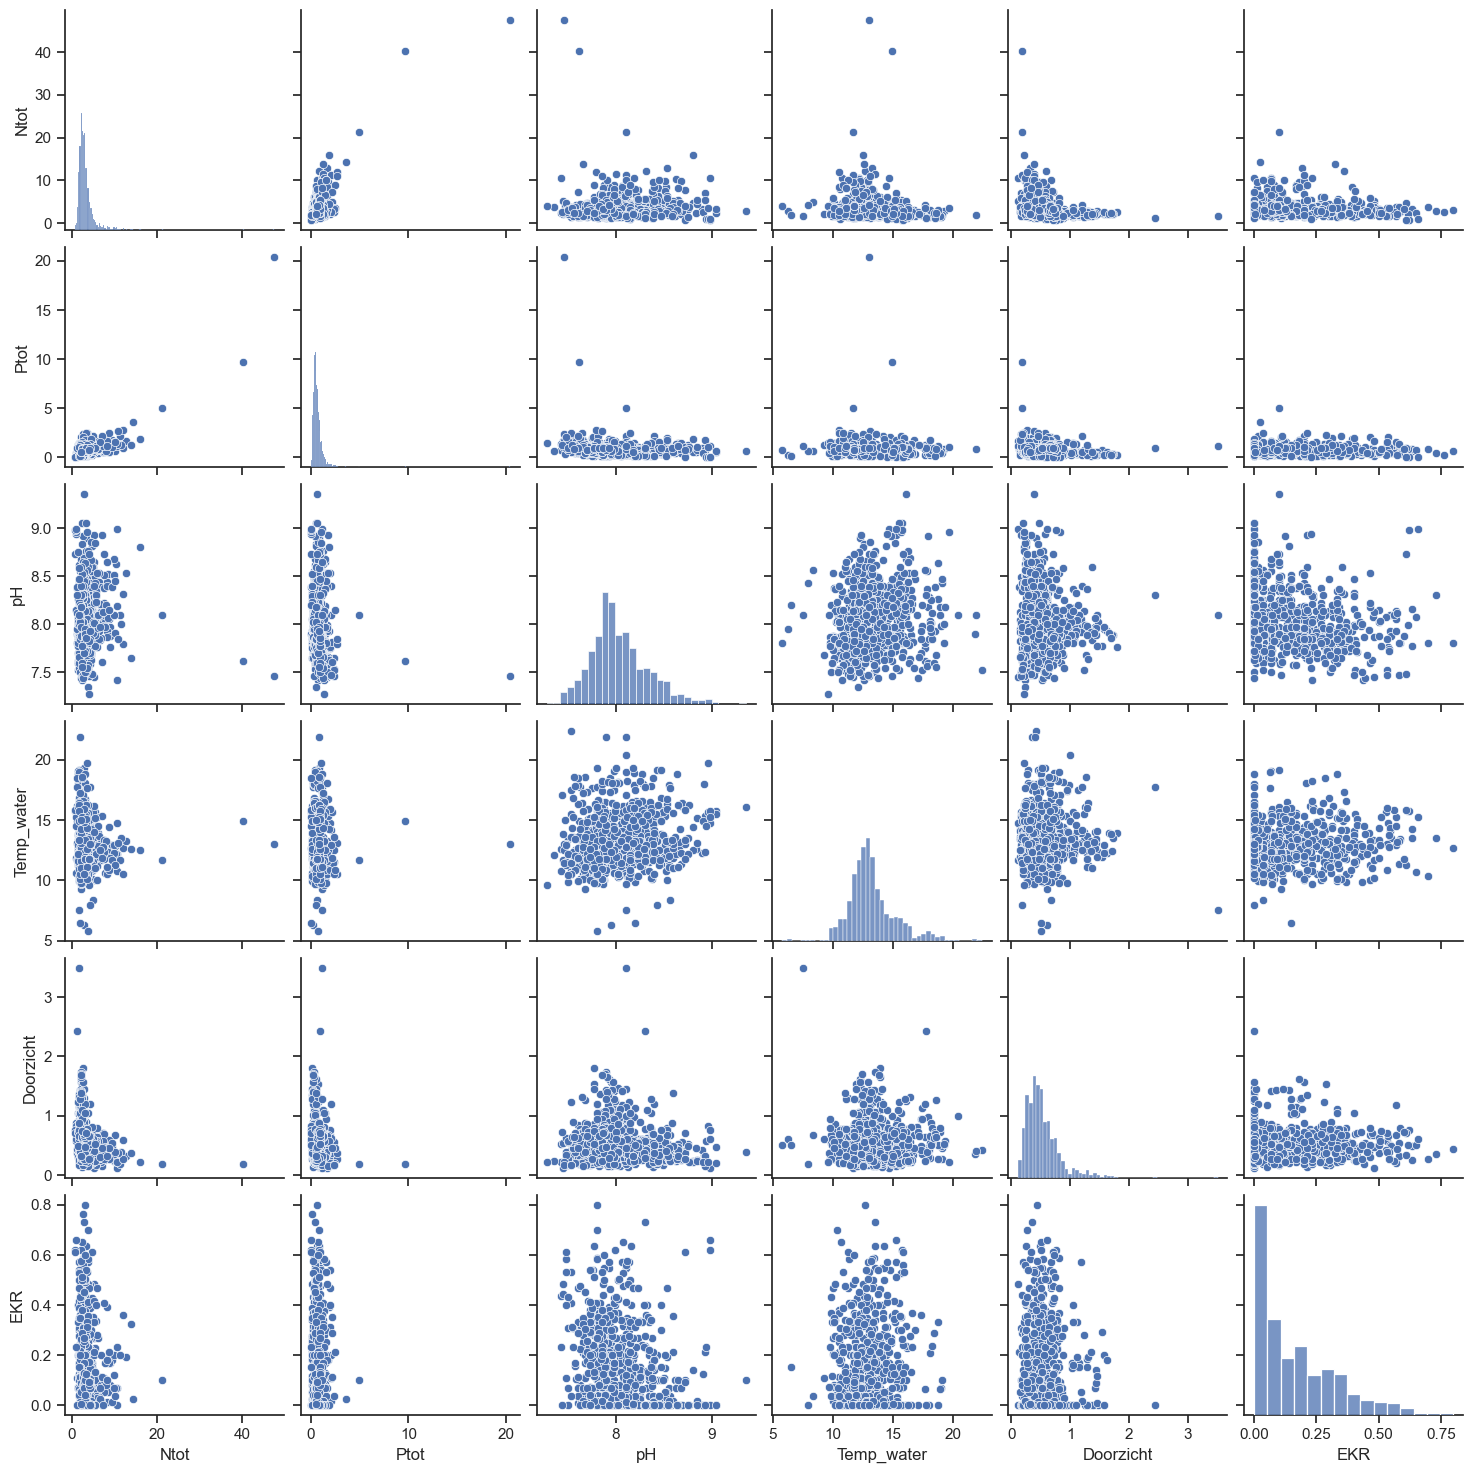

In [121]:
sns.set_theme(style="ticks")
sns.pairplot(df_EKR_Chemie_heatmap.drop("Jaar", axis = 1)) #, hue="Jaar")

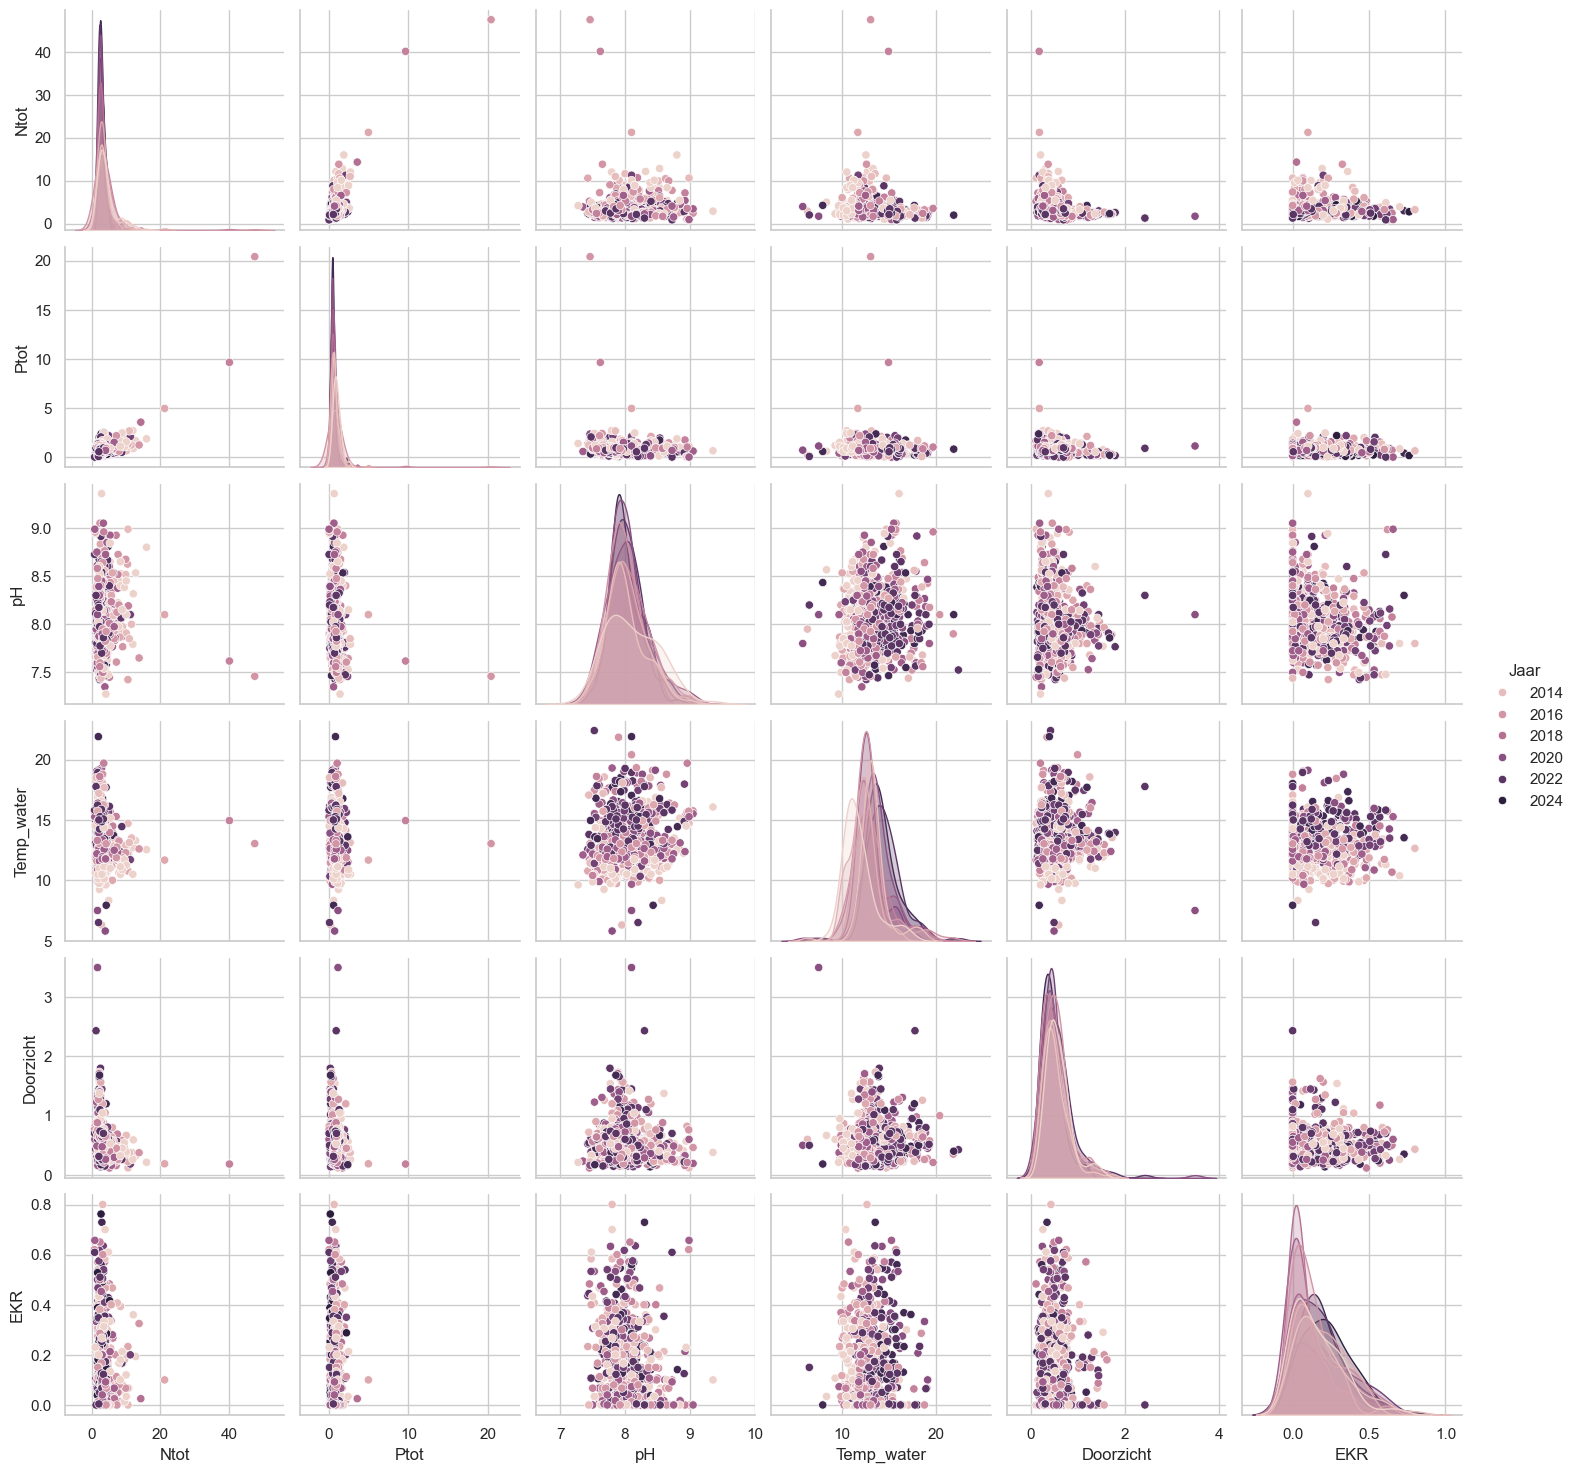

In [119]:
# sns.set_theme(style="whitegrid")
sns.color_palette("tab10")
sns.pairplot(df_EKR_Chemie_heatmap, hue="Jaar")